# <center>Titanic: Survival Prediction</center>

## Table of Contents:
* [Introduction](#introduction)
* [Importing the libraries & Loading the dataset](#step1)
* [Data Exploration](#step2)
* [Data Cleaning](#step3)
* [Data Visualization](#step4)
* [Building the Model](#step5)


## Introduction <a id="introduction"></a>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

<img src="https://miro.medium.com/max/800/1*ukzDTJD4ieskdL5hfKpBOA.jpeg" width=300></img>

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, I'll build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e. name, age, gender, socio-economic class etc).

## Importing the libraries & Loading the dataset <a id="step1"></a>

In [1]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import scipy.stats as spst

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , AdaBoostClassifier , ExtraTreesClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score , StratifiedKFold , GridSearchCV , learning_curve

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Exploration <a id ="step2"></a>

We will see how our data look like, use the describe function for the key statistics, use the shape function (how many rows and columns are in our dataset).


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
print('Shape of Training set: {}'.format(train.shape))
print('Shape of Test set: {}'.format(test.shape))

Shape of Training set: (891, 12)
Shape of Test set: (418, 11)


##### Checking the type of each feature

In [6]:
print('Type of train columns: \n\n')
print(train.dtypes)
print()
print('Type of test columns: \n\n')
print(test.dtypes)

Type of train columns: 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type of test columns: 


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### Describing the data

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning <a id="step3"></a>

In [8]:
missing_train_data = train.isnull().sum()
missing_train_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
missing_tcol = []
for column in train.columns.values.tolist():
    if(missing_train_data[column] > 0):
        print("Column: ",column)
        print("Missing Data: {} ({:.2f}%)".format(missing_train_data[column], (missing_train_data[column] * 100/ len(train))))
        print("Data Type: ",train[column].dtypes)
        print("")
        missing_tcol.append(column)


Column:  Age
Missing Data: 177 (19.87%)
Data Type:  float64

Column:  Cabin
Missing Data: 687 (77.10%)
Data Type:  object

Column:  Embarked
Missing Data: 2 (0.22%)
Data Type:  object



As we can see from above statistics, we have **3 missing columns** for 'Train' data:

1. **Age** : 177 missing data (19.87%)
2. **Cabin**: 687 missing data (77.1%)
3. **Embarked**: 2 missing data (0.22%)

In [10]:
missing_test_data = test.isnull().sum()
missing_test_data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
missing_colt = []
for column in test.columns.values.tolist():
    if(missing_test_data[column] > 0):
        print("Column: ",column)
        print("Missing Data: {} ({:.2f}%)".format(missing_test_data[column], (missing_test_data[column] * 100/ len(test))))
        print("Data Type: ",test[column].dtypes)
        print("")
        missing_colt.append(column)


Column:  Age
Missing Data: 86 (20.57%)
Data Type:  float64

Column:  Fare
Missing Data: 1 (0.24%)
Data Type:  float64

Column:  Cabin
Missing Data: 327 (78.23%)
Data Type:  object



As we can see from above statistics, we have **3 missing columns** for 'Test' data:

1. **Age**: 86 missing data (20.57%)
2. **Cabin**: 327 missing data (78.23%)
3. **Fare**: 1 missing data (0.24%)

###### Impact of Missing Data on our Dataset
We'll plot our Good vs. Missing Data in order to get an idea about the proportion between these 2 variables and to establish what we're doing in the next phase.


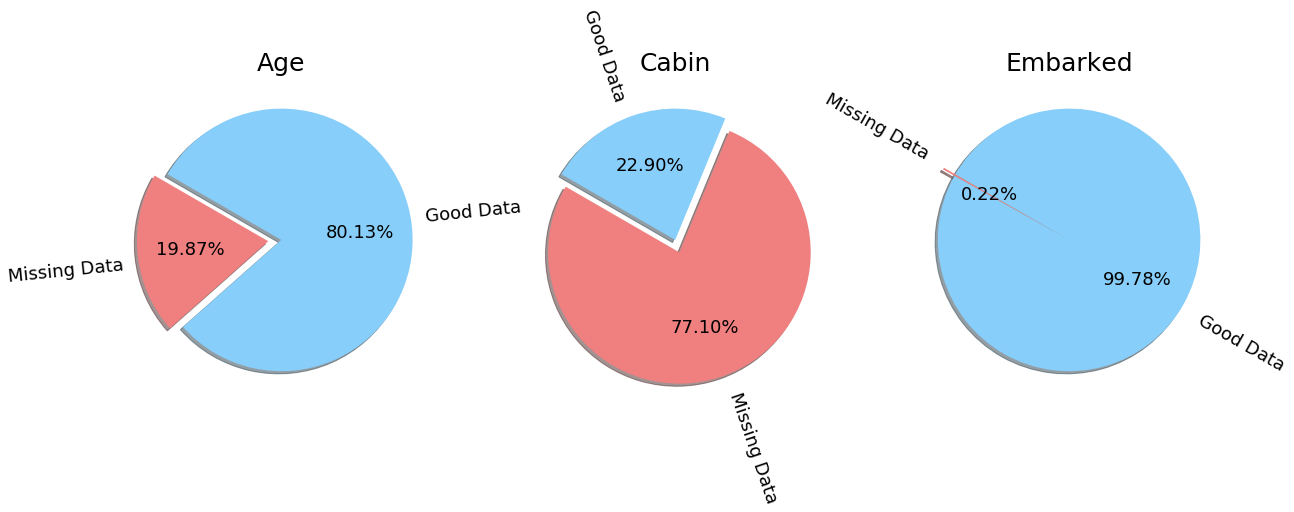

In [12]:
fig = plt.figure(figsize=(20,14))
i = 0

for column in missing_tcol:
    bad = missing_train_data[column].sum()
    good = len(train) - missing_train_data[column].sum()
    x = [bad, good]
    labels = 'Missing Data', 'Good Data'
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice
    i = i+1
    fig.add_subplot(1,3,i)
    
    # Plot
    plt.title(column, fontsize = 25)
    plt.pie(x, explode=explode, labels=labels, colors=colors,
    autopct='%.2f%%', shadow=True, startangle=150, rotatelabels = True, textprops={'fontsize': 18})

plt.show()


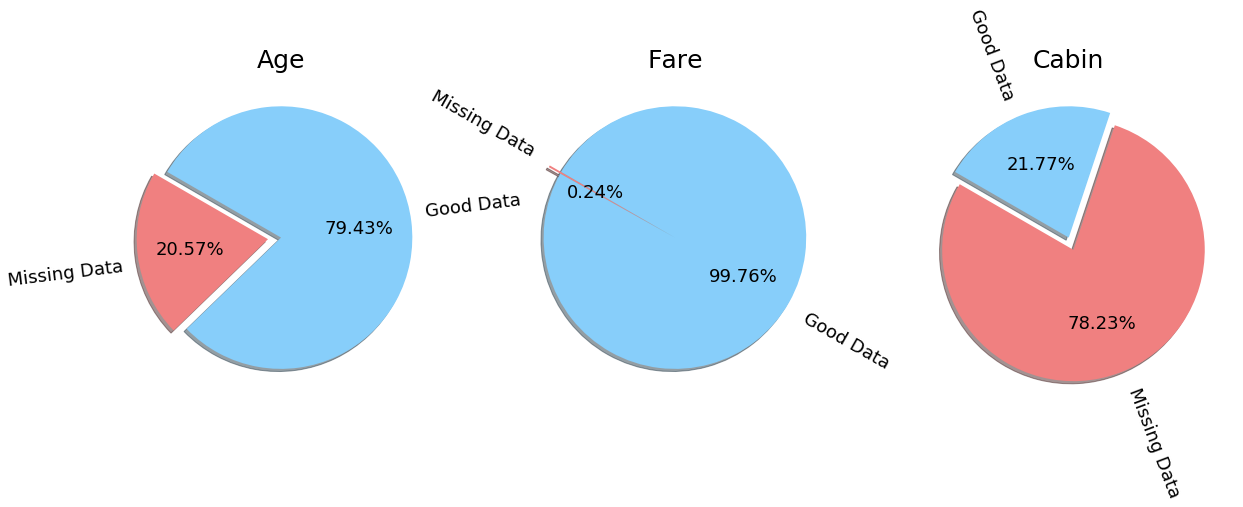

In [13]:
fig = plt.figure(figsize=(20,14))
i = 0

for column in missing_colt:
    bad = missing_test_data[column].sum()
    good = len(test) - missing_test_data[column].sum()
    x = [bad, good]
    labels = 'Missing Data', 'Good Data'
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice
    i = i+1
    fig.add_subplot(1,3,i)
    
    # Plot
    plt.title(column, fontsize = 25)
    plt.pie(x, explode=explode, labels=labels, colors=colors,
    autopct='%.2f%%', shadow=True, startangle=150, rotatelabels = True, textprops={'fontsize': 18})

plt.show()


### Fix Missing Data
We have 2 ways in which we can handle the missing data:

1. Drop data
 1. drop the whole row
 2. drop the whole column
2. Replace data
 1. replace it by mean
 2. replace it by frequency
 3. replace it based on other features/functions

#### Drop the 'Cabin' column for both 'train' and 'test' data as well

In [279]:
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)

In [280]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


**Embarked** is a categorical feature and there are only 2 missing values in the whole dataset. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't necessarily mean that they embarked from that port.

When I googled **Stone, Mrs. George Nelson (Martha Evelyn)**, I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page <a href="https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html">Martha Evelyn Stone: Titanic Survivor</a>. Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28. This is the information needed and case closed for Embarked feature.

In [281]:
train['Embarked'].replace(np.nan,'S',inplace=True)

In [282]:
correlations = train.iloc[:,1:].corr()
correlations

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


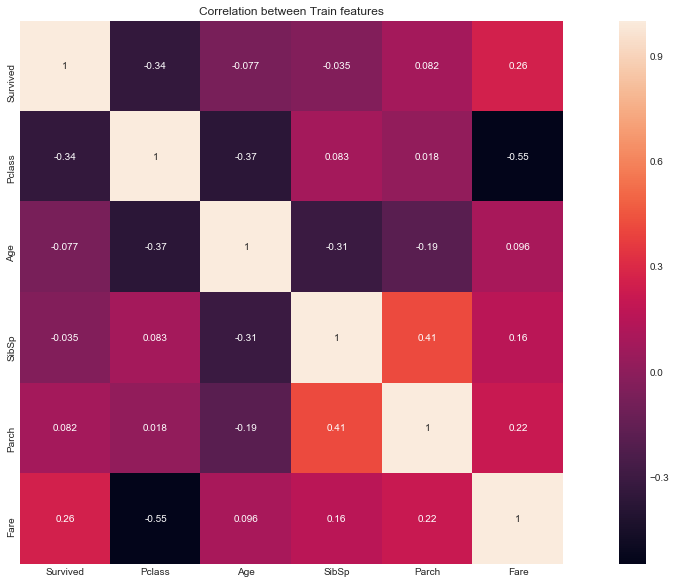

In [283]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlations, annot=True, square=True)
plt.title('Correlation between ''Train'' features')
plt.show()

Missing values in **Age** feature are filled with the median age, but using the median age of the whole data set is not a good option. Median age of a group is much better because the new values would be more informative. Median age of Pclass groups is the best choice because of its high correlation with Age (0.37) and Survived (0.34) features, and it has only 3 unique values. It also makes more sense to group ages by passenger classes instead of other features.

In order to be more accurate, Sex feature is used as the second level of groupby. As seen from below, the Pclass and Sex groups have distinct median Age values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age compared to males. The median ages below are used for filling the missing values in Age feature.



In [14]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [285]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [18]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined
combined = get_combined_data()
print(combined.shape)


(1309, 10)


In [19]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
    
print(titles)

{'the Countess', 'Rev', 'Major', 'Master', 'Miss', 'Mme', 'Sir', 'Col', 'Ms', 'Jonkheer', 'Mr', 'Dr', 'Mrs', 'Don', 'Lady', 'Capt', 'Mlle'}


In [25]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    return combined

In [26]:
combined = get_titles()

In [27]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [29]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [31]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [35]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return combined

In [36]:
combined = process_age()

In [37]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [39]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    return combined

In [40]:
combined = process_names()

In [41]:
combined.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [42]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    return combined

In [43]:
combined = process_fares()

In [44]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    return combined

In [45]:
combined = process_embarked()

In [46]:
combined.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [47]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [49]:
print(train_cabin, test_cabin)

{'F', 'B', 'U', 'E', 'A', 'C', 'G', 'D', 'T'} {'F', 'B', 'U', 'E', 'A', 'C', 'G', 'D'}


In [50]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    return combined

In [51]:
combined = process_cabin()

In [52]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [54]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':0, 'female':1})
    return combined

In [55]:
combined = process_sex()

In [56]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    return combined

combined = process_pclass()

In [57]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
    
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [59]:
print(len(tickets))

37


In [72]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    return combined

In [73]:
combined = process_ticket()

In [75]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return combined

In [76]:
combined = process_family()
combined.shape

(1309, 67)

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [78]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [80]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [81]:
train, test, targets = recover_train_test_target()

In [82]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [83]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

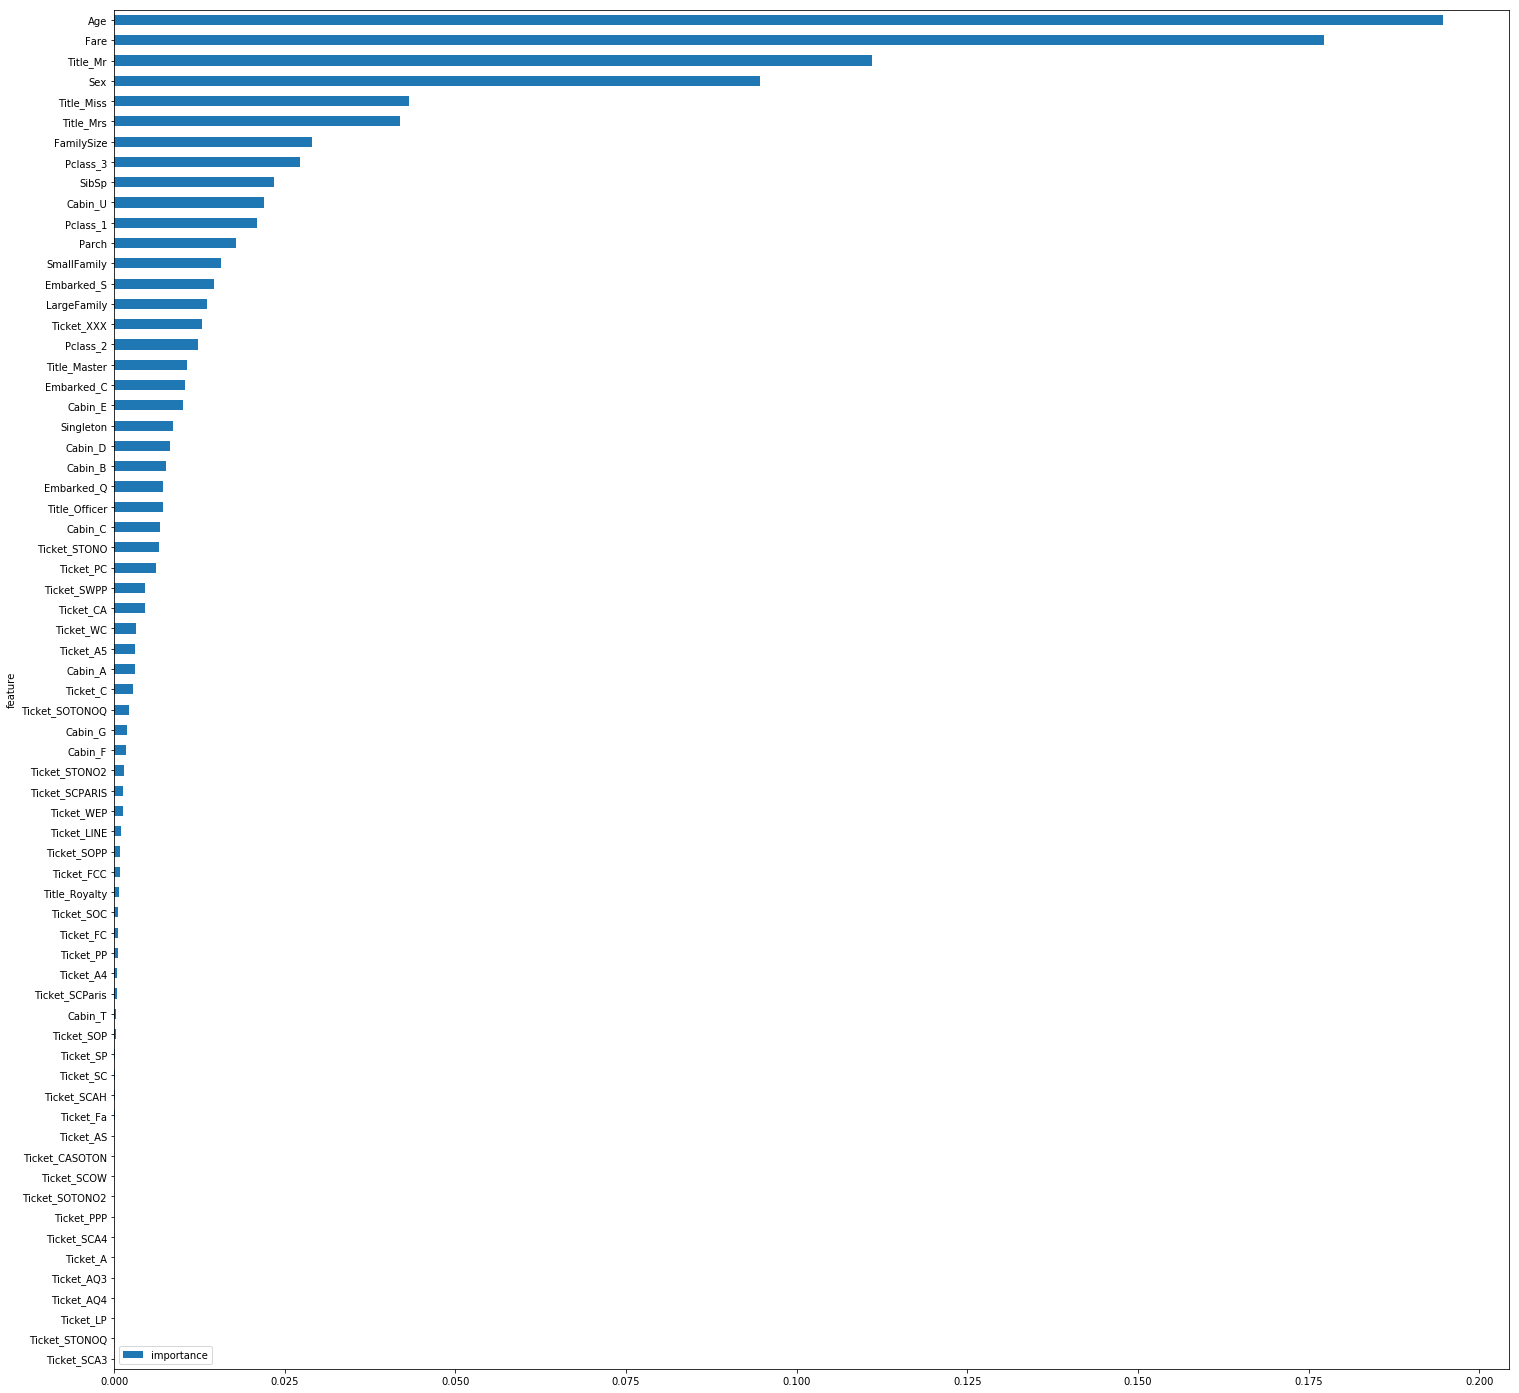

In [84]:
features.plot(kind='barh', figsize=(25, 25))


In [86]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 13)


In [87]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 13)


In [89]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [91]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8148430714802218
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

CV score = 0.8226832026674356
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8058981759969814
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>


C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Raluca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CV score = 0.8249176976842577
****


In [92]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [93]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)

In [287]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [288]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization <a id="step4"></a>

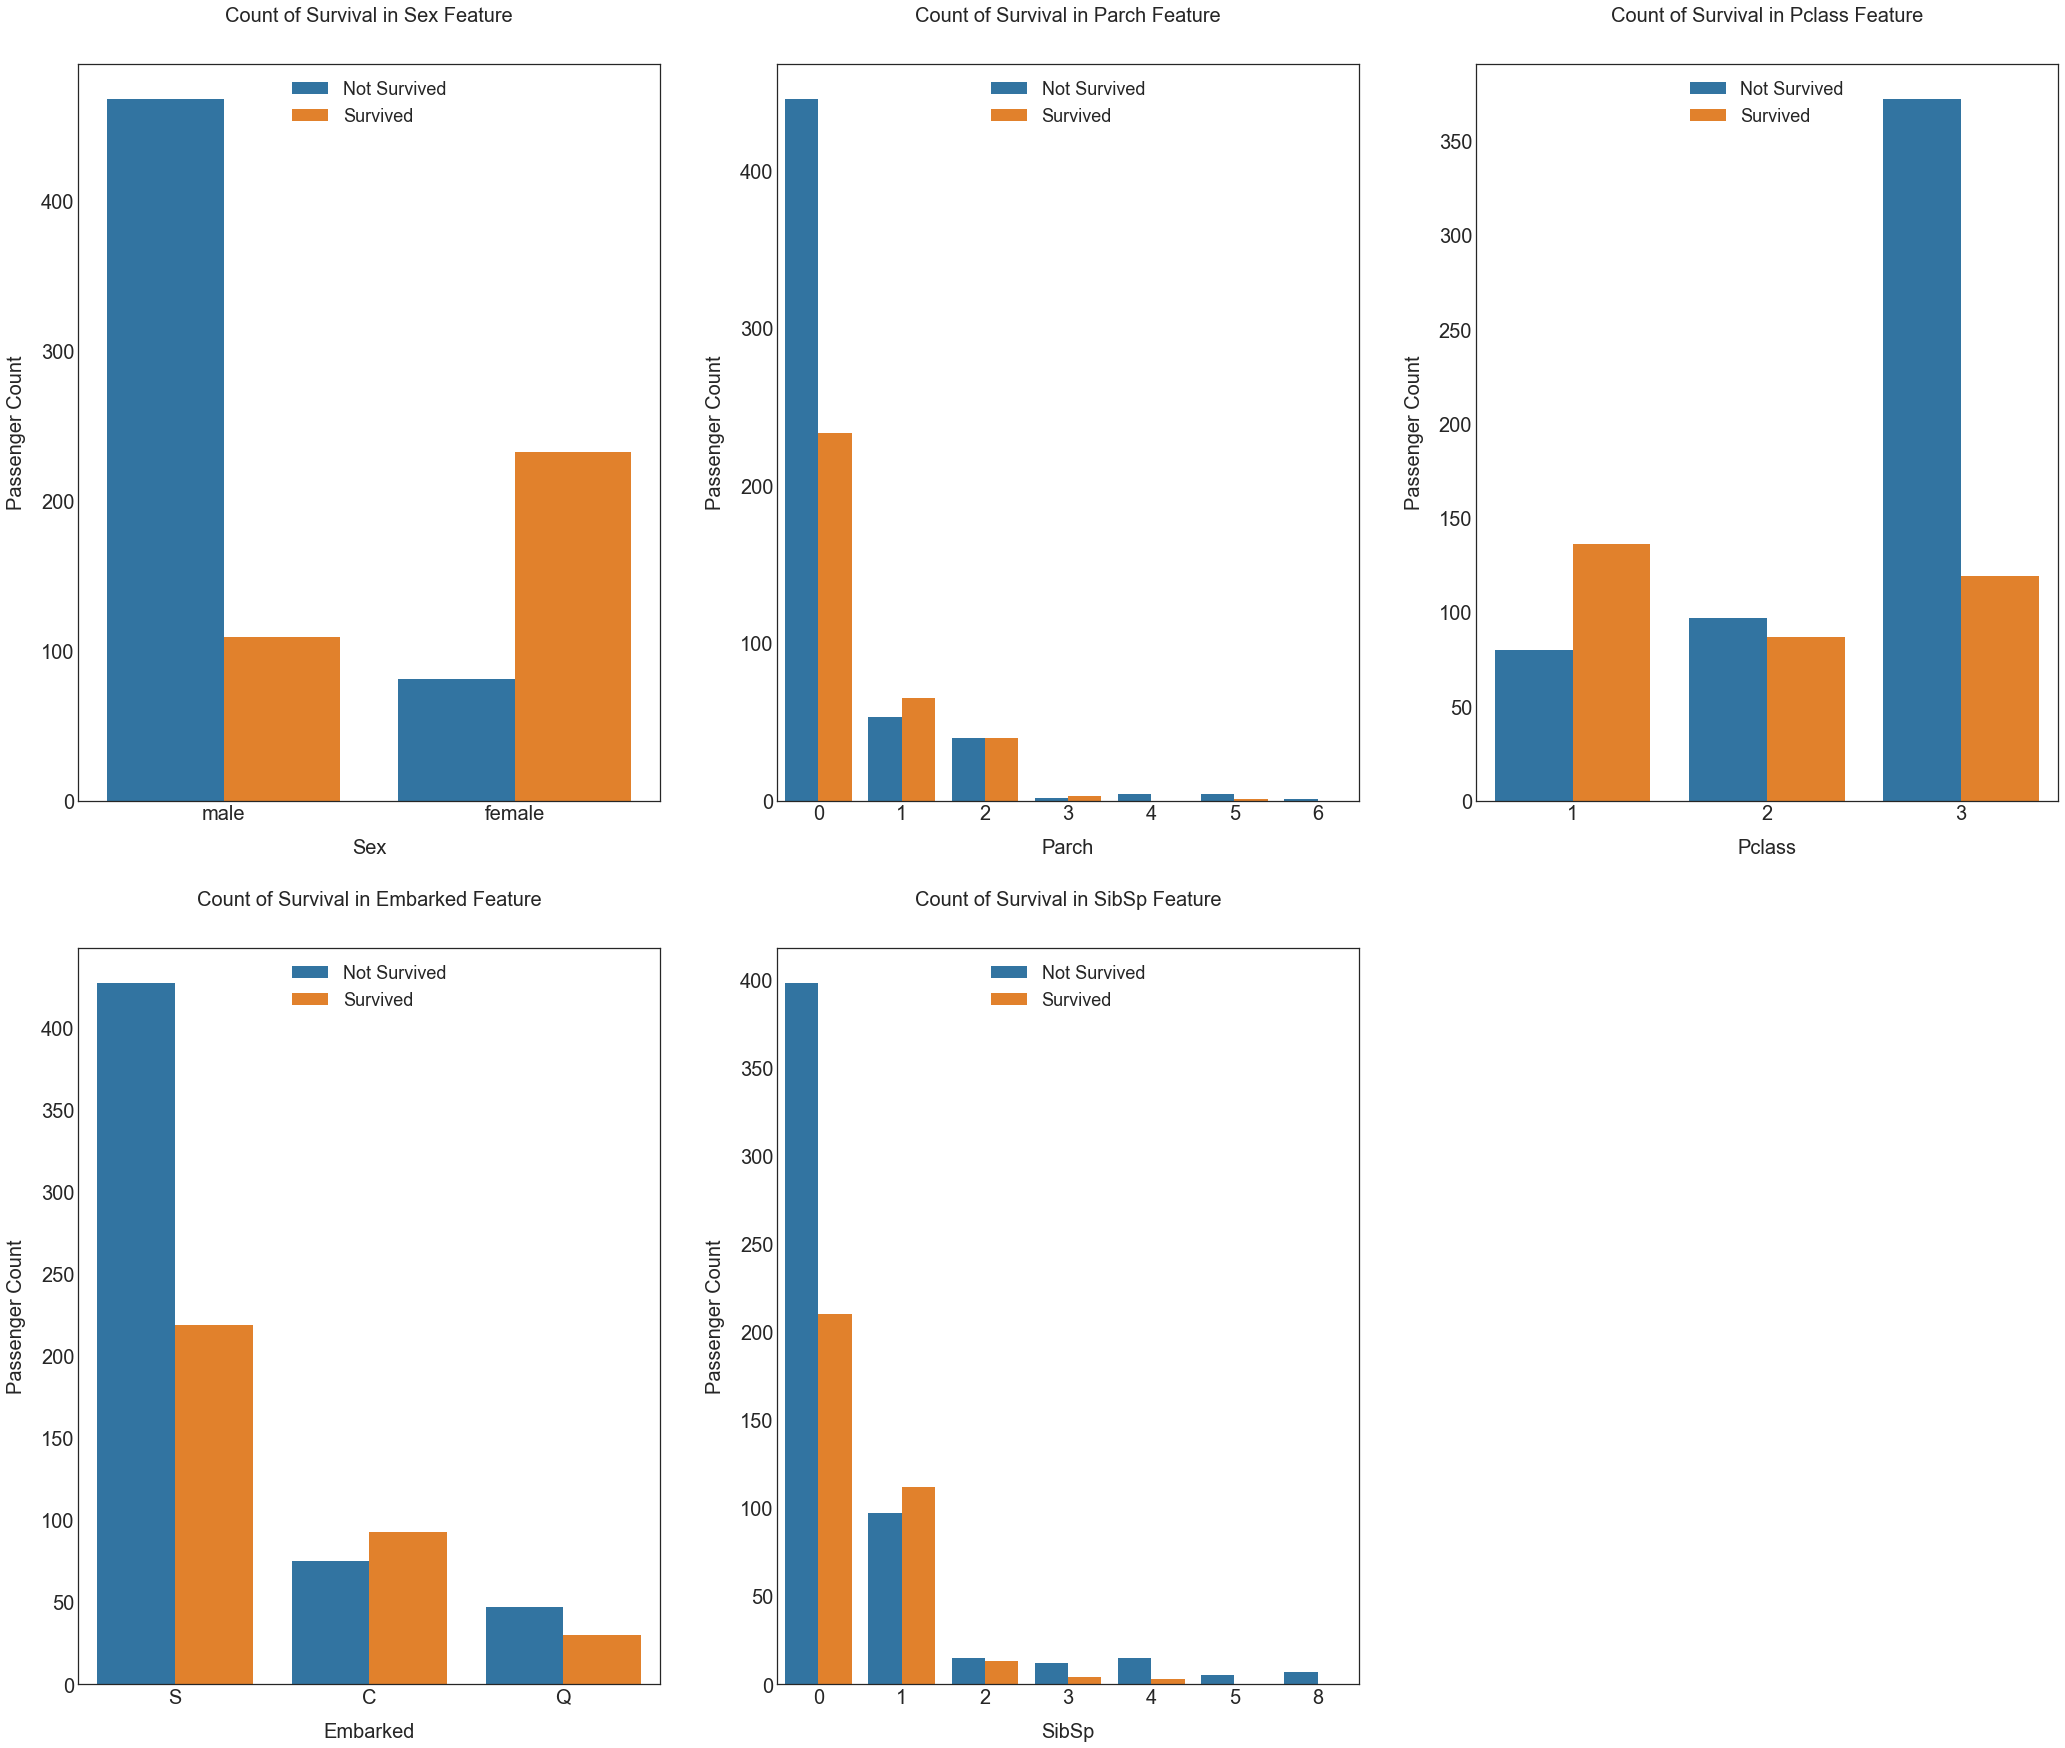

In [289]:
cat_features = ['Sex', 'Parch', 'Pclass', 'Embarked', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

#### Remarks
- Every categorical feature has at least one class with high not-survived rate. Those classes are very helpful to predict whether the passenger is a survivor or victim when they are used as a feature with one-hot encoding.
- Passengers boarded from Southampton has a lower survival rate unlike other ports. More than half of the passengers boarded from Cherbourg survived. This observation could be related to Pclass feature.
- Parch and SibSp features show that passengers with only one family member has a higher survival rate.
- Best categorical features are Pclass and Sex because they have the most homogenous classes.

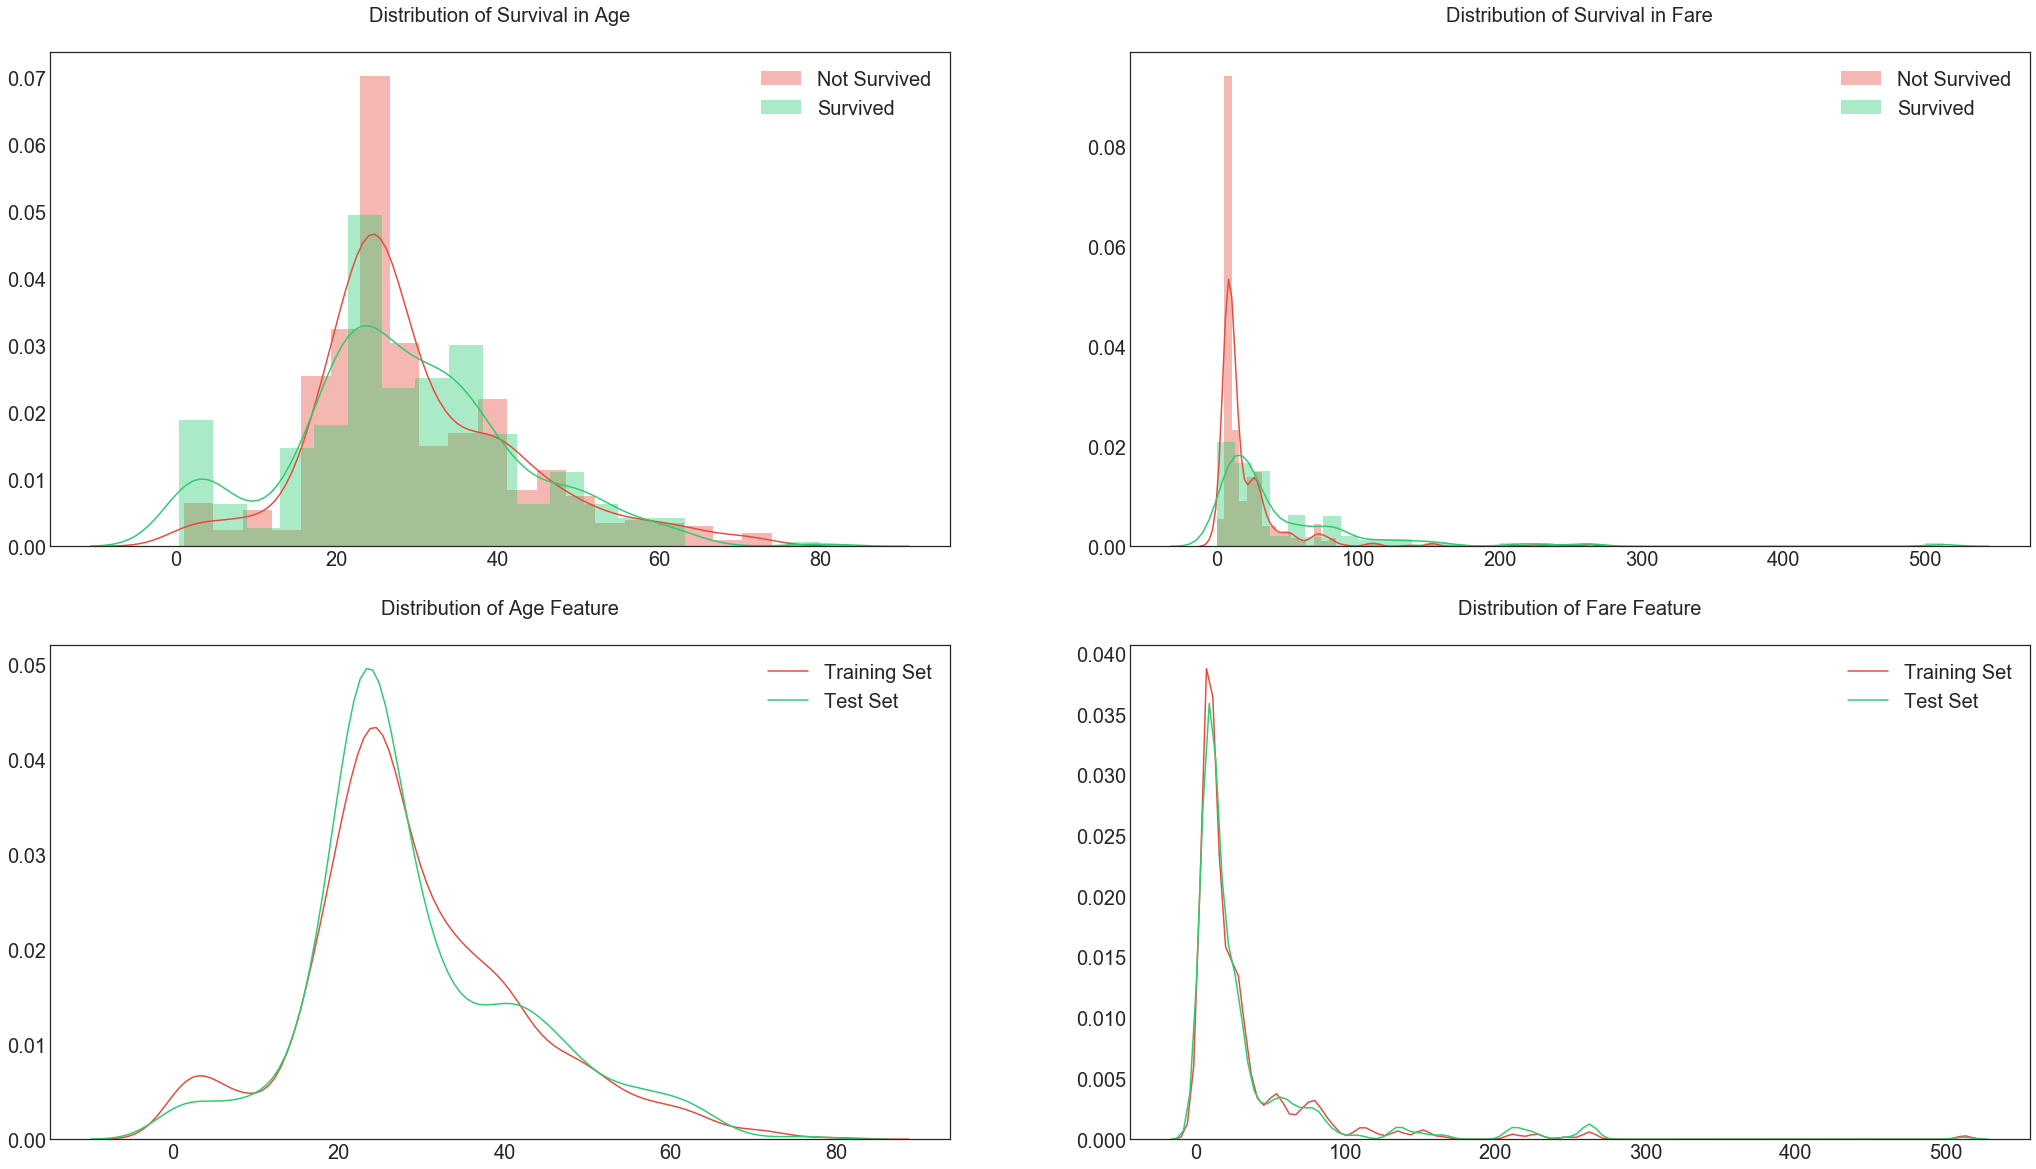

In [290]:
cont_features = ['Age', 'Fare']
surv = train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

 #### Remarks:
 - Distribution of Age feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups.
 - In the distribution of Fare feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extreme outliers.
 - One potential problem for both features is, the distribution has more spikes are bumps in training set, but it is smoother in test set. The machine learning algorithm may not able to generalize to test set because of this reason.


### Binning the continuous features

#### 1. Fare

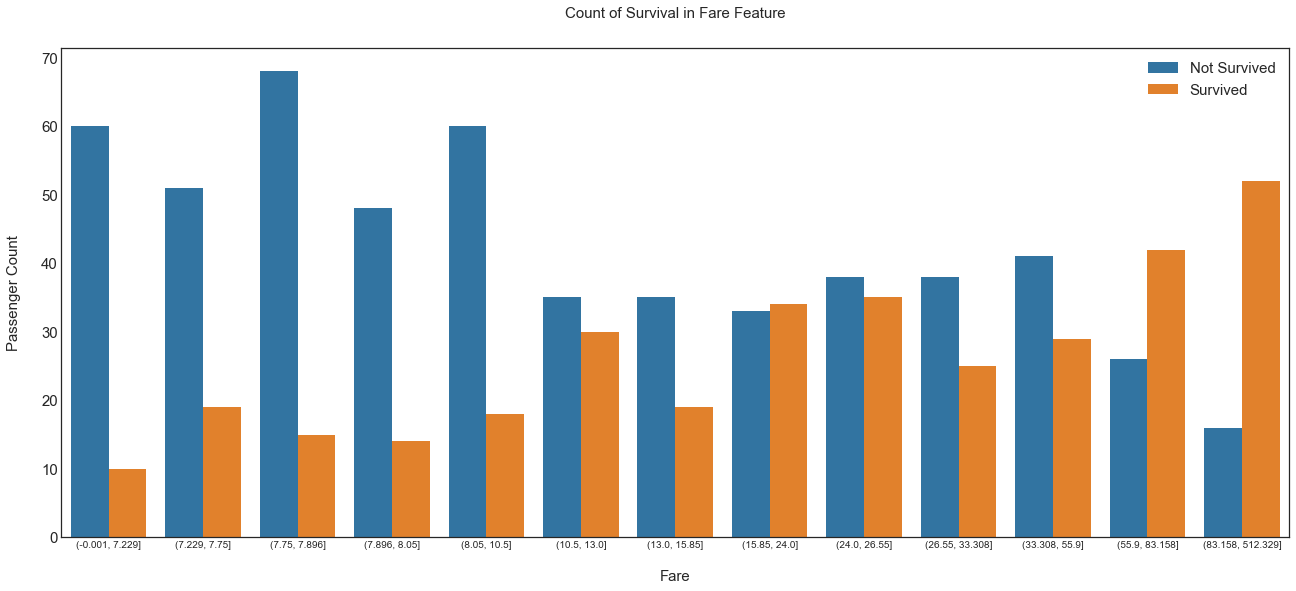

In [291]:
train['Fare'] = pd.qcut(train['Fare'], 13)
test['Fare'] = pd.qcut(test['Fare'],13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=train)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

- Fare feature is positively skewed and survival rate is extremely high on the right end.
- The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate. This high survival rate was not visible in the distribution graph.

#### 2. Age

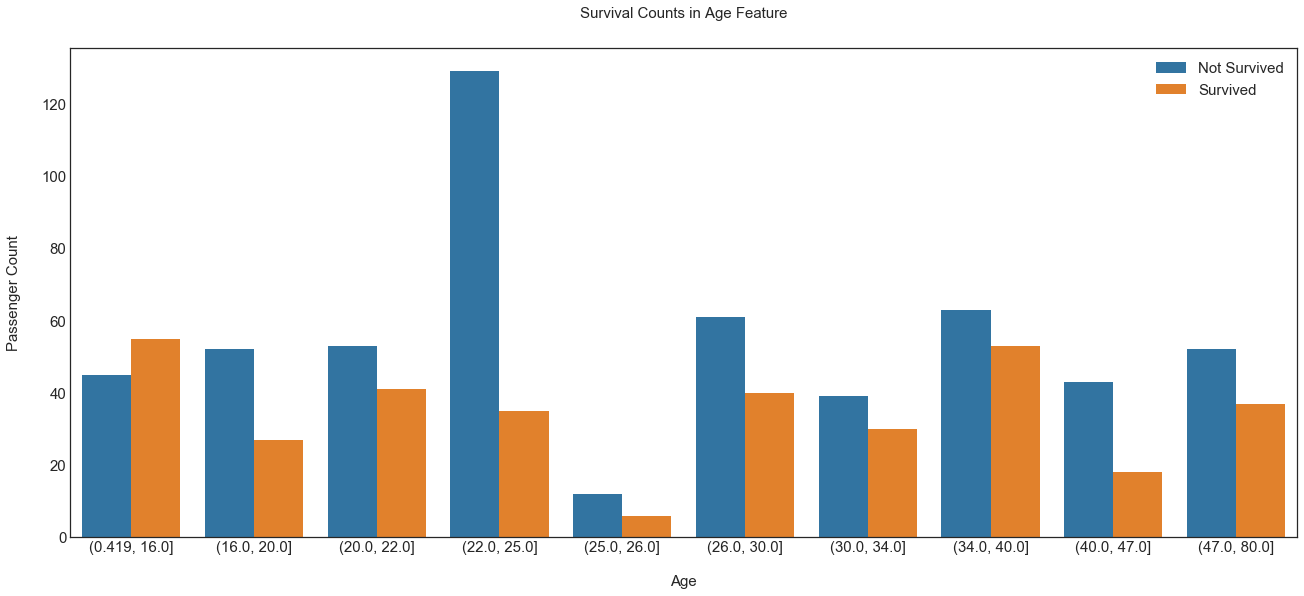

In [292]:
train['Age'] = pd.qcut(train['Age'], 10)
test['Age'] = pd.qcut(test['Age'],10)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=train)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

#### 3. Family Size

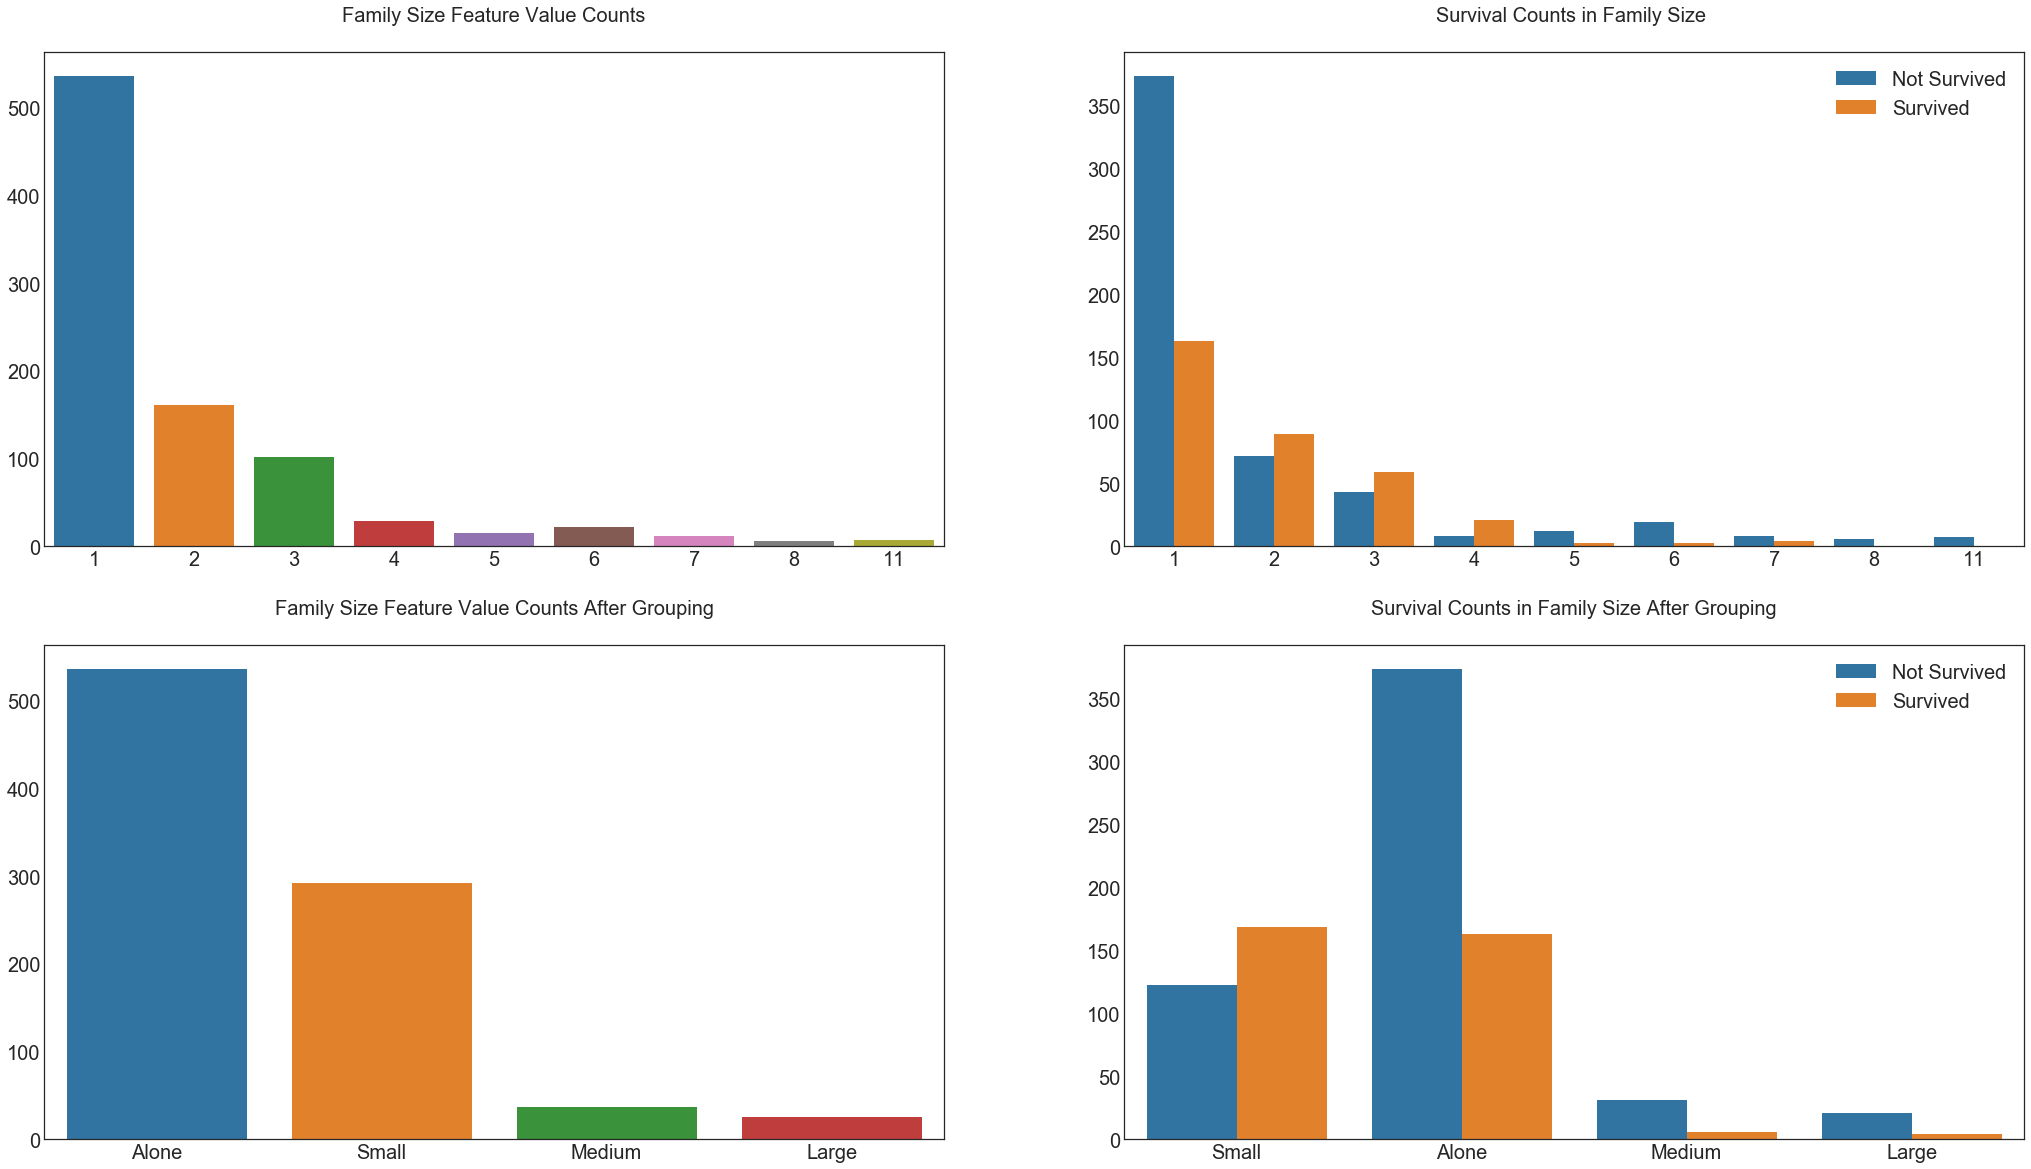

In [293]:
# We create a new feature, Family Size, that counts the number of family members and we want to see which categories of families
# are likely to have a high survival rate.

train['Family Size'] = train['SibSp'] + train['Parch'] + 1
test['Family Size'] = test['SibSp'] + test['Parch'] + 1


fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=train['Family Size'].value_counts().index, y=train['Family Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family Size', hue='Survived', data=train, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train['Family_Size_Grouped'] = train['Family Size'].map(family_map)
test['Family_Size_Grouped'] = test['Family Size'].map(family_map)

sns.barplot(x=train['Family_Size_Grouped'].value_counts().index, y=train['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=train, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

**Family Size** is created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Those columns are added to find the total size of families. Adding 1 at the end, is the current passenger.
- Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.
- Family Size with 1 are labeled as Alone.
- Family Size with 2, 3 and 4 are labeled as Small.
- Family Size with 5 and 6 are labeled as Medium.
- Family Size with 7, 8 and 11 are labeled as Large.

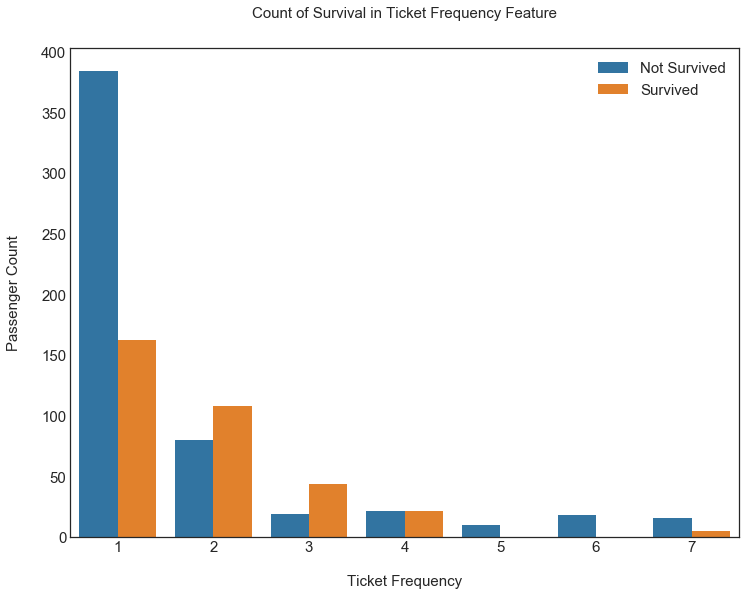

In [294]:
train['Ticket_Frequency'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Ticket_Frequency'] = test.groupby('Ticket')['Ticket'].transform('count')


fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=train)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

#### 4. Title/Name

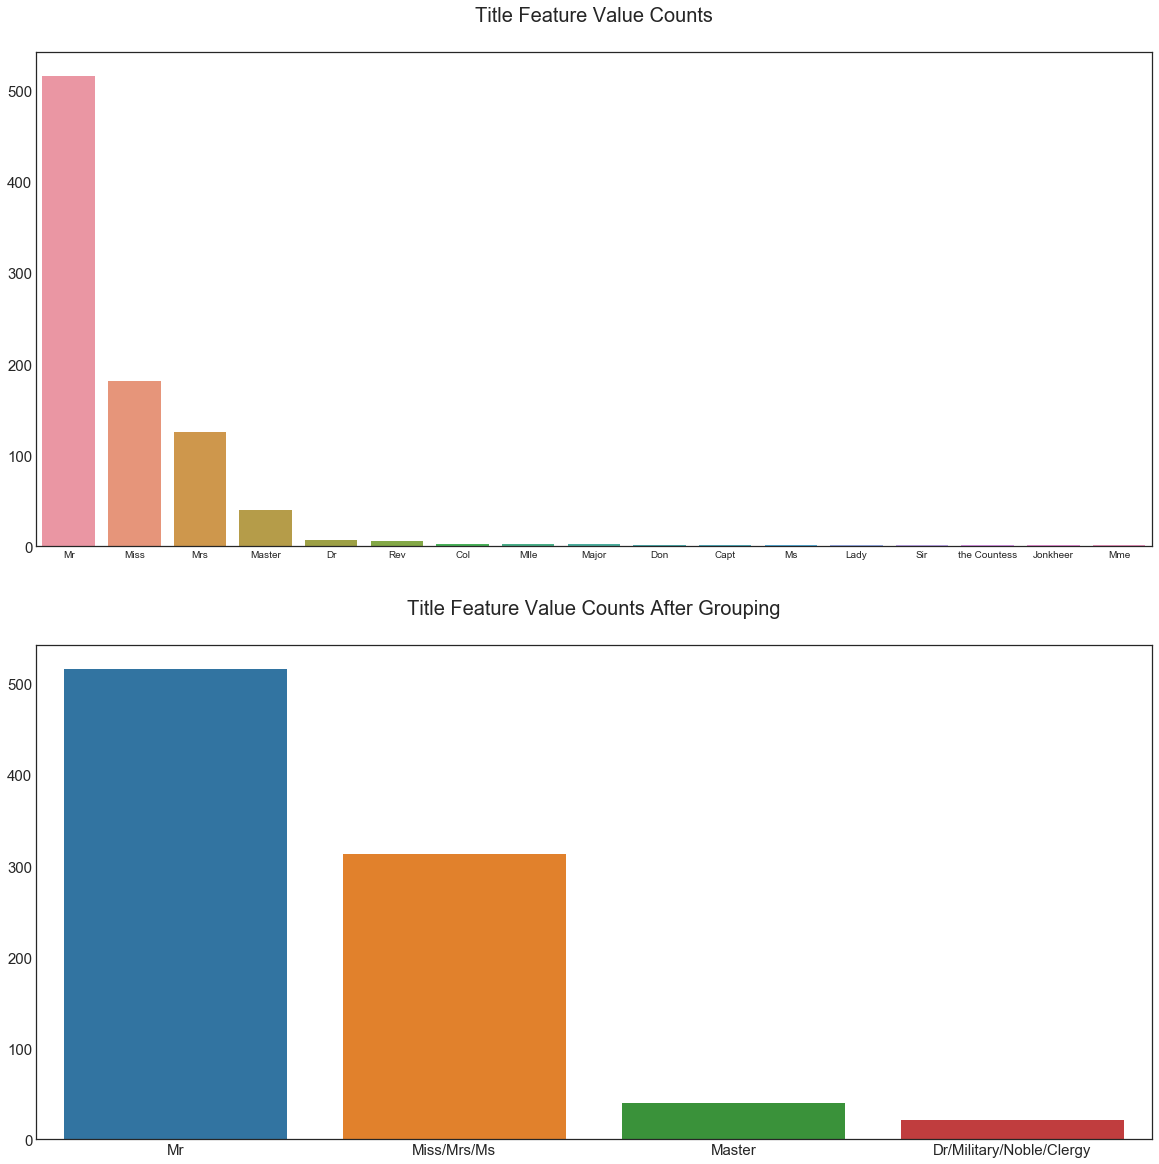

In [295]:
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train['Is_Married'] = 0
train['Is_Married'].loc[train['Title'] == 'Mrs'] = 1

test['Title'] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test['Is_Married'] = 0
test['Is_Married'].loc[test['Title'] == 'Mrs'] = 1

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=train['Title'].value_counts().index, y=train['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

train['Title'] = train['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train['Title'] = train['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=train['Title'].value_counts().index, y=train['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

### Feature Transformation

#### 1. Label Encoding the Non-Numerical Features
- Embarked, Sex, Title and Family_Size_Grouped are object type, and Age and Fare features are category type. They are converted to numerical type with LabelEncoder. LabelEncoder basically labels the classes from 0 to n. This process is necessary for Machine Learning algorithms to learn from those features.

In [296]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']


train['Age'] = LabelEncoder().fit_transform(train['Age'])
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
train['Sex']= LabelEncoder().fit_transform(train['Sex'])
train['Title']=LabelEncoder().fit_transform(train['Title'])
train['Family_Size_Grouped'] = LabelEncoder().fit_transform(train['Family_Size_Grouped'])
train['Fare'] = LabelEncoder().fit_transform(train['Fare'])
train = train.drop(columns=['Ticket','Name'])

In [297]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,892,3,"Kelly, Mr. James",male,"(33.0, 41.0]",0,0,330911,"(7.75, 7.86]",Q,1,Alone,1,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,"(41.0, 48.0]",1,0,363272,"(-0.001, 7.25]",S,2,Small,1,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,"(48.0, 76.0]",0,0,240276,"(8.05, 10.5]",Q,1,Alone,1,Mr,0
3,895,3,"Wirz, Mr. Albert",male,"(25.0, 28.1]",0,0,315154,"(8.05, 10.5]",S,1,Alone,1,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,"(21.0, 23.0]",1,1,3101298,"(10.5, 13.0]",S,3,Small,1,Mrs,1


In [298]:
test['Age'] = LabelEncoder().fit_transform(test['Age'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])
test['Sex']= LabelEncoder().fit_transform(test['Sex'])
test['Title']=LabelEncoder().fit_transform(test['Title'])
test['Family_Size_Grouped'] = LabelEncoder().fit_transform(test['Family_Size_Grouped'])
test['Fare'] = LabelEncoder().fit_transform(test['Fare'])
test = test.drop(columns=['Ticket','Name'])

In [299]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,892,3,1,7,0,0,2,1,1,0,1,5,0
1,893,3,0,8,1,0,0,2,2,3,1,6,1
2,894,2,1,9,0,0,4,1,1,0,1,5,0
3,895,3,1,5,0,0,4,2,1,0,1,5,0
4,896,3,0,2,1,1,5,2,3,3,1,6,1


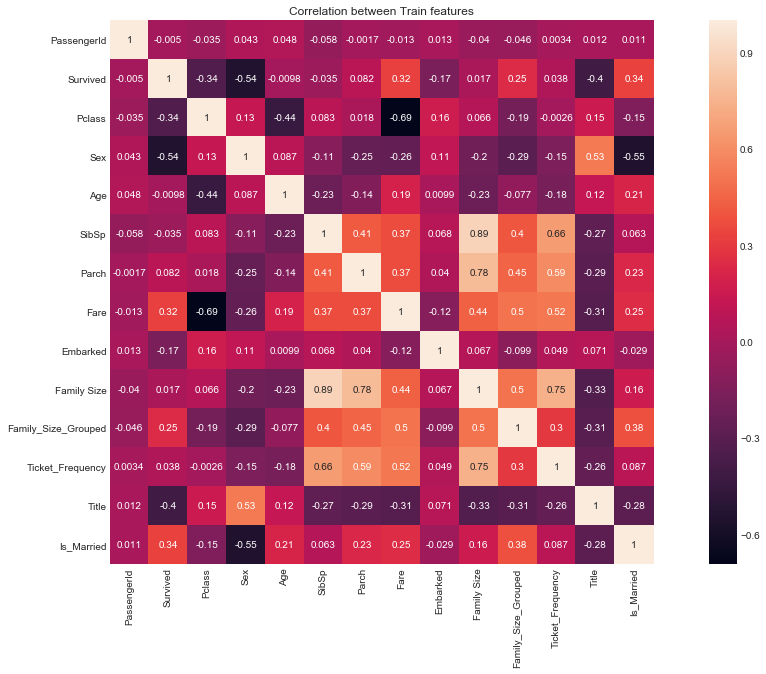

In [300]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, square=True)
plt.title('Correlation between ''Train'' features')
plt.show()

## Building the Model (Machine Learning) <a id="step5"></a>

In [301]:
# Putting independent variables/features to X
X = train.drop(columns = ['Survived','PassengerId'])

# Putting response/dependent variable/feature to y
y = train.Survived

In [330]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

In [331]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,892,3,1,7,0,0,2,1,1,0,1,5,0
1,893,3,0,8,1,0,0,2,2,3,1,6,1
2,894,2,1,9,0,0,4,1,1,0,1,5,0
3,895,3,1,5,0,0,4,2,1,0,1,5,0
4,896,3,0,2,1,1,5,2,3,3,1,6,1


In [332]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,1,0,3,1,2,1,0,1,2,2,3,1,3,0
1,2,1,1,0,7,1,0,11,0,2,3,1,2,1
2,3,1,3,0,4,0,0,3,2,1,0,1,2,0
3,4,1,1,0,7,1,0,10,2,2,3,2,2,1
4,5,0,3,1,7,0,0,3,2,1,0,1,3,0


In [333]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

X = train.drop(columns = ['Survived','PassengerId'])
X_test = test.drop(columns = ['PassengerId'])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Logistic Regression

In [340]:
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(X,y)

y_pred_train = logisticRegression.predict(X)
y_pred_test = logisticRegression.predict(X_test)


print('Logistic Regression accuracy score with all features for Train data: {0:0.4f}'. format(accuracy_score(y, y_pred_train)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred_test})
output.to_csv('LR_submission.csv', index=False)
print("Your submission was successfully saved!")

Logistic Regression accuracy score with all features for Train data: 0.8182
Your submission was successfully saved!


In [337]:
## Cross-Fold Validation
cross_val_model = LogisticRegression(random_state=0,solver='lbfgs')
scores = cross_val_score(cross_val_model, X, 
         y, cv=10)
print(scores,'\n')
print('Accuracy with cross-validation: {}'.format(np.mean(scores)))

[0.8        0.8        0.7752809  0.87640449 0.83146067 0.80898876
 0.83146067 0.80898876 0.80898876 0.79545455] 

Accuracy with cross-validation: 0.813702757916241


### Decision Tree

In [346]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
decisionTree.fit(X, y)

tree_prediction_train = decisionTree.predict(X)
tree_prediction_test = decisionTree.predict(X_test) 


print('Decision tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,tree_prediction_train)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': tree_prediction_test})
output.to_csv('DT_submission.csv', index=False)
print("Your submission was successfully saved!")

Decision tree accuracy score for Train data: 0.9394
Your submission was successfully saved!


In [347]:
decisionTreeMax = DecisionTreeClassifier(criterion='entropy',max_depth=4)
decisionTreeMax.fit(X, y)

tree_prediction_trainM = decisionTreeMax.predict(X)
tree_prediction_testM = decisionTreeMax.predict(X_test) 


print('Decision tree accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,tree_prediction_trainM)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': tree_prediction_testM})
output.to_csv('DT1_submission.csv', index=False)
print("Your submission was successfully saved!")

Decision tree accuracy score for Train data: 0.8328
Your submission was successfully saved!


In [308]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(X_train, y_train)
print("Best cross validaton score", locally_best_tree.best_score_)

Best cross validaton score 0.8170144462279294


### Gradient Boosting

In [348]:
from xgboost import XGBClassifier
XGB = XGBClassifier(learning_rate = 0.1, n_estimators = 100)
XGB.fit(X, y)

# Predicting the Test set results
y_pred_trainXGB = XGB.predict(X)
y_pred_testXGB = XGB.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,y_pred_trainXGB)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred_testXGB})
output.to_csv('GB_submission.csv', index=False)
print("Your submission was successfully saved!")

Gradient Boosting accuracy score for Train data: 0.8642
Your submission was successfully saved!


### KNN

In [350]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)

# Predicting the Test set results
y_pred_trainKNN = knn.predict(X)
y_pred_testKNN = knn.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,y_pred_trainKNN)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred_testKNN})
output.to_csv('KNN_submission.csv', index=False)
print("Your submission was successfully saved!")

Gradient Boosting accuracy score for Train data: 0.8373
Your submission was successfully saved!


### Naive Bayes

In [311]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

# Predicting the Test set results
y_pred_trainNB = nb.predict(X_train)
y_pred_testNB =nb.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,y_pred_trainNB)))
print('Gradient Boosting accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test,y_pred_testNB)))

Gradient Boosting accuracy score for Train data: 0.8010
Gradient Boosting accuracy score for Test data: 0.7761


### Random Forest

In [312]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X,y)

# Predicting the Test set results
y_pred_trainRF = rforest.predict(X)
y_pred_testRF =rforest.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,y_pred_trainRF)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred_testRF})
output.to_csv('RF_submission.csv', index=False)
print("Your submission was successfully saved!")

Gradient Boosting accuracy score for Train data: 0.9213
Gradient Boosting accuracy score for Test data: 0.7948


### CatBoost

In [313]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
cat.fit(X_train,y_train)

# Predicting the Test set results
y_pred_trainC = cat.predict(X_train)
y_pred_testC =cat.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y_train,y_pred_trainC)))
print('Gradient Boosting accuracy score for Test data: {0:0.4f}'.format(accuracy_score(y_test,y_pred_testC)))

0:	learn: 0.4796100	total: 870us	remaining: 870us
1:	learn: 0.4521338	total: 1.57ms	remaining: 0us
Gradient Boosting accuracy score for Train data: 0.7961
Gradient Boosting accuracy score for Test data: 0.7910


### AdaBoost

In [345]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada.fit(X, y)

# Predicting the Test set results
y_pred_trainA = ada.predict(X)
y_pred_testA =ada.predict(X_test)

print('Gradient Boosting accuracy score for Train data: {0:0.4f}'.format(accuracy_score(y,y_pred_trainA)))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred_testA})
output.to_csv('ADA_submission.csv', index=False)
print("Your submission was successfully saved!")

Gradient Boosting accuracy score for Train data: 0.8316
Your submission was successfully saved!


## Making predictions on unseen data

In [315]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,1,0,3,1,2,1,0,1,2,2,3,1,3,0
1,2,1,1,0,7,1,0,11,0,2,3,1,2,1
2,3,1,3,0,4,0,0,3,2,1,0,1,2,0
3,4,1,1,0,7,1,0,10,2,2,3,2,2,1
4,5,0,3,1,7,0,0,3,2,1,0,1,3,0


In [316]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,892,3,1,7,0,0,2,1,1,0,1,5,0
1,893,3,0,8,1,0,0,2,2,3,1,6,1
2,894,2,1,9,0,0,4,1,1,0,1,5,0
3,895,3,1,5,0,0,4,2,1,0,1,5,0
4,896,3,0,2,1,1,5,2,3,3,1,6,1


In [324]:
predKNN = knn.predict(test.iloc[:,1:])
predLR = logisticRegression.predict(test.iloc[:,1:])

submission_df = {"PassengerId": test["PassengerId"],
                 "Survived": predKNN}
submission = pd.DataFrame(submission_df)


submission_df1 = {"PassengerId": test["PassengerId"],
                 "Survived": predLR}
submission1 = pd.DataFrame(submission_df1)


submission.to_csv("submissionKNN.csv",index=False)
submission1.to_csv("submissionLR.csv",index=False)